# Pandas DataFrame for storing tweet feed (total 12 points)

Creating the following date frame for storing tweets:

- **climate_feed_df** DataFrame for storing tweets
- **retweeted_status_df** for storing original tweets

In [165]:
import pandas as pd
import ast
import numpy as np
import nltk
import re
import requests
from bs4 import BeautifulSoup as bsp

The pickle files retweeted_status_df.pkl and climate_feed.pkl should be in the same folder as this notebook.
If needed, they can also be downloaded by uncommenting the commands below.

In [6]:
#!wget https://github.com/psnegi/data_science_tools1/raw/master/hws/retweeted_status_df.pkl

In [7]:
#!wget https://github.com/psnegi/data_science_tools1/raw/master/hws/climate_feed.pkl

<font color= "red">Click on these links if the above downloads fail. </font>


https://github.com/psnegi/data_science_tools1/raw/master/hws/climate_feed.pkl

https://github.com/psnegi/data_science_tools1/raw/master/hws/retweeted_status_df.pkl

Keep these pickle files in the same directory as the notebook

In [81]:
retweeted_status_df = pd.read_pickle("./retweeted_status_df.pkl")

In [82]:
retweeted_status_df

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,scopes,source,text,truncated,user
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,None,Sat Feb 09 20:27:45 +0000 2019,"{'hashtags': [], 'user_mentions': [], 'urls': ...",NaN,99.0,False,None,1.094332e+18,1094332044052549633,...,NaN,NaN,NaN,81.0,False,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",The National Party declares war on the Glouces...,True,"{'default_profile': False, 'protected': False,..."
2,NaN,None,Sat Feb 09 23:56:18 +0000 2019,"{'hashtags': [], 'user_mentions': [], 'urls': ...",NaN,6.0,False,None,1.094385e+18,1094384528267902977,...,"{'favorited': False, 'favorite_count': 2642, '...",1.093999e+18,1093998640392220673,5.0,False,NaN,"<a href=""http://twitter.com/download/android"" ...",This is the same idiot who thought\nThe southe...,False,"{'default_profile': False, 'protected': False,..."
3,NaN,None,Sat Feb 09 23:34:27 +0000 2019,"{'hashtags': [], 'user_mentions': [], 'urls': ...",NaN,190.0,False,None,1.094379e+18,1094379028608438272,...,"{'favorited': False, 'favorite_count': 220, 'i...",1.093932e+18,1093931686998487040,31.0,False,NaN,"<a href=""http://twitter.com/download/android"" ...",Communism is Fascism. Fighting Climate Change ...,True,"{'default_profile': False, 'protected': False,..."
4,NaN,None,Sat Feb 09 19:07:56 +0000 2019,"{'hashtags': [], 'user_mentions': [], 'urls': ...",NaN,2905.0,False,None,1.094312e+18,1094311957669265408,...,NaN,NaN,NaN,599.0,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Unmitigated climate change would literally des...,True,"{'default_profile': True, 'protected': False, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,NaN,None,Sat Feb 09 20:56:39 +0000 2019,"{'hashtags': [], 'user_mentions': [], 'urls': ...",NaN,1.0,False,None,1.094339e+18,1094339317324017665,...,NaN,NaN,NaN,1.0,False,NaN,"<a href=""http://twitter.com/download/android"" ...",72% of Americans are 'very worried' about clim...,False,"{'default_profile': True, 'protected': False, ..."
9995,NaN,None,Thu Feb 07 20:27:55 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,3491.0,False,None,1.093607e+18,1093607309606076416,...,NaN,NaN,NaN,482.0,False,NaN,"<a href=""http://twitter.com/download/android"" ...",@JFaurall @MgBenchjeweler @SpeakerPelosi Calif...,True,"{'default_profile': True, 'protected': False, ..."
9996,NaN,None,Sat Feb 09 18:33:00 +0000 2019,"{'hashtags': [], 'user_mentions': [], 'urls': ...",NaN,12586.0,False,None,1.094303e+18,1094303164805799936,...,NaN,NaN,NaN,2801.0,False,NaN,"<a href=""https://about.twitter.com/products/tw...",President Trump believes we should listen to f...,True,"{'default_profile': False, 'protected': False,..."
9997,NaN,None,Fri Feb 08 22:15:50 +0000 2019,"{'hashtags': [], 'user_mentions': [], 'urls': ...",NaN,4249.0,False,None,1.093997e+18,1093996855111966720,...,"{'favorited': False, 'favorite_count': 551, 'i...",1.093893e+18,1093893115633647616,642.0,False,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Wait til he hears how much climate change is g...,False,"{'default_profile': False, 'protected': False,..."


In [83]:
#climate_feed_df.to_pickle("./climate_feed.pkl")
climate_feed_df = pd.read_pickle("./climate_feed.pkl")
climate_feed_df

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user_id
0,None,None,Sun Feb 10 00:17:31 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,0,False,None,1094389867499405313,1094389867499405313,...,NaN,NaN,NaN,0,False,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",.@SteveKingIA says he's unsure about the scien...,True,31476142
1,None,None,Sun Feb 10 00:17:30 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,0,False,None,1094389862193455105,1094389862193455105,...,NaN,NaN,NaN,81,False,1.094332e+18,"<a href=""http://tapbots.com/tweetbot"" rel=""nof...",RT @RobOakeshott1: The National Party declares...,False,996782298
2,None,None,Sun Feb 10 00:17:26 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,0,False,None,1094389844078485506,1094389844078485506,...,NaN,1093998640392220673,1093998640392220673,5,False,1.094385e+18,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @emilia_suze: This is the same idiot who th...,False,45333453
3,None,None,Sun Feb 10 00:17:24 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,0,False,None,1094389837522599936,1094389837522599936,...,NaN,1093931686998487040,1093931686998487040,31,False,1.094379e+18,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @PrettyBadLefty: Communism is Fascism. Figh...,False,1020067726532829185
4,None,None,Sun Feb 10 00:17:23 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,0,False,None,1094389831419994112,1094389831419994112,...,NaN,NaN,NaN,599,False,1.094312e+18,"<a href=""http://twitter.com/download/android"" ...",RT @kenklippenstein: Unmitigated climate chang...,False,19889325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,None,None,Sat Feb 09 20:57:54 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,0,False,None,1094339630500012033,1094339630500012033,...,NaN,NaN,NaN,1,False,1.094339e+18,"<a href=""http://twitter.com/download/android"" ...",RT @fromhello2hello: 72% of Americans are 'ver...,False,888112320097918976
9995,None,None,Sat Feb 09 20:57:54 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,0,False,None,1094339629107400704,1094339629107400704,...,NaN,NaN,NaN,482,False,1.093607e+18,"<a href=""http://twitter.com/download/iphone"" r...",RT @stuntdaddy_42: @JFaurall @MgBenchjeweler @...,False,3324836714
9996,None,None,Sat Feb 09 20:57:53 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,0,False,None,1094339627316641794,1094339627316641794,...,NaN,NaN,NaN,2801,False,1.094303e+18,"<a href=""http://twitter.com/download/android"" ...",RT @SenSanders: President Trump believes we sh...,False,1487109794
9997,None,None,Sat Feb 09 20:57:51 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,0,False,None,1094339619569557504,1094339619569557504,...,NaN,1093893115633647616,1093893115633647616,642,False,1.093997e+18,"<a href=""http://twitter.com/download/iphone"" r...",RT @KateAronoff: Wait til he hears how much cl...,False,4737089913


Here are dtypes for climate_feed_df. We'll work with only
- entities to extract hashtags
- retweeted_status in case we need to extract original full tweet
- truncated
- text: tweet text
- created_at
- user_id

Some of them have wrong datatypes.

In [12]:
climate_feed_df.dtypes

contributors                  object
coordinates                   object
created_at                    object
entities                      object
extended_entities             object
favorite_count                object
favorited                     object
geo                           object
id                            object
id_str                        object
in_reply_to_screen_name       object
in_reply_to_status_id         object
in_reply_to_status_id_str     object
in_reply_to_user_id           object
in_reply_to_user_id_str       object
is_quote_status               object
lang                          object
metadata                      object
place                         object
possibly_sensitive            object
quoted_status                 object
quoted_status_id              object
quoted_status_id_str          object
retweet_count                 object
retweeted                     object
retweeted_status             float64
source                        object
t

# Q1 (points .5) Replace None with nan in climate_feed_df. Also display some random rows.


In [84]:
columns = climate_feed_df.columns
for column in columns:
    climate_feed_df[column].replace('None', np.nan, inplace=True)


In [85]:
climate_feed_df.sample(5)

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user_id
8439,NaN,NaN,Sat Feb 09 21:27:08 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,0,False,NaN,1094346988634628096,1094346988634628096,...,NaN,NaN,NaN,15,False,1.094253e+18,"<a href=""http://twitter.com/download/iphone"" r...",RT @merylbatchelder: My sole purpose as an edu...,False,344289537
737,NaN,NaN,Sun Feb 10 00:02:26 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,0,False,NaN,1094386071184519169,1094386071184519169,...,NaN,NaN,NaN,3,False,1.094384e+18,"<a href=""http://twitter.com/download/iphone"" r...","RT @fordm: Boomers are the Habsburgs, millenni...",False,2823058728
8358,NaN,NaN,Sat Feb 09 21:28:49 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,0,False,NaN,1094347411378585600,1094347411378585600,...,NaN,1094283099695992832,1094283099695992832,180,False,1.094291e+18,"<a href=""http://twitter.com/download/iphone"" r...",RT @WhitfordBradley: Scientific ignorance as i...,False,796366941325762560
4882,NaN,NaN,Sat Feb 09 22:39:07 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,0,False,NaN,1094365102994800640,1094365102994800640,...,NaN,NaN,NaN,14,False,1.094363e+18,"<a href=""http://twitter.com/download/iphone"" r...",RT @CBCNews: Canadian-led research has found t...,False,254695129
9104,NaN,NaN,Sat Feb 09 21:14:39 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,1,False,NaN,1094343844815138817,1094343844815138817,...,NaN,NaN,NaN,0,False,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",@hlphoenix @SenWhitehouse @FinancialTimes @Bro...,False,38194026


Working with only selected attributes.

In [97]:
climate_feed_df = climate_feed_df[['created_at', 'entities','retweeted_status', 'truncated', 'user_id', 'text' ]].copy()

In [98]:
climate_feed_df.sample(10)

,created_at,entities,retweeted_status,truncated,user_id,text
7667,2019-02-09 21:43:21+00:00,"{'hashtags': [], 'user_mentions': [{'id_str': ...",1.094338e+18,True,717898403833909248,"RT @NewYorker: The Green New Deal, a resolutio..."
174,2019-02-10 00:13:41+00:00,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,True,832788979393060867,@KINGWEWUIZ @Tamaraw68415067 @ThurstonDana @zk...
773,2019-02-10 00:01:58+00:00,"{'hashtags': [], 'user_mentions': [{'id_str': ...",1.094341e+18,True,196768022,RT @McNameeJason: @WatershedWatch_ Killing and...
9596,2019-02-09 21:05:32+00:00,"{'hashtags': [], 'user_mentions': [{'id_str': ...",1.094212e+18,True,226070187,RT @marklevinshow: The insane Democrat Left. ...
8856,2019-02-09 21:19:04+00:00,"{'hashtags': [], 'user_mentions': [{'id_str': ...",1.093303e+18,True,2289454939,RT @kennedystewart: Yesterday I spoke with aro...
8914,2019-02-09 21:17:52+00:00,"{'hashtags': [], 'user_mentions': [{'id_str': ...",1.094038e+18,True,2209799083,RT @djmor6: 'Dire consequences': Court's mine ...
962,2019-02-09 23:58:25+00:00,"{'hashtags': [], 'user_mentions': [{'id_str': ...",1.094359e+18,True,1582824926,RT @_Oliver_Yates: If only Abbott could fight ...
5133,2019-02-09 22:33:31+00:00,"{'hashtags': [], 'user_mentions': [{'id_str': ...",1.094303e+18,True,47124590,RT @SenSanders: President Trump believes we sh...
4801,2019-02-09 22:40:44+00:00,"{'hashtags': [], 'user_mentions': [{'id_str': ...",1.094354e+18,True,467038656,RT @michaeldaleyMP: A government led by me wil...
7074,2019-02-09 21:54:11+00:00,"{'hashtags': [], 'user_mentions': [{'id_str': ...",1.094353e+18,True,21537504,"RT @MatthewHootonNZ: Rod Oram, arguing NZ, wit..."


# Q2 (points .5 =.25+.25) convert
- created_at to date time type
- truncated to bool type.


In [99]:
# write code here
climate_feed_df['created_at'] = pd.to_datetime(climate_feed_df['created_at'])
climate_feed_df['truncated'] = climate_feed_df['truncated'].astype('bool')

Checking datatype again

In [100]:
climate_feed_df.dtypes

created_at          datetime64[ns, UTC]
entities                         object
retweeted_status                float64
truncated                          bool
user_id                           int64
text                             object
dtype: object

# Q3(points .5) In climate_feed_df, calculate the number of NAN values in various columns

In [123]:
# write code here
columns = climate_feed_df.columns
nan_dict = '{'
for column in columns:
    h = climate_feed_df[column].isna().sum()
    if column != 'text':
        nan_dict = nan_dict +'"'+ column + '":' + str(h) +', '
    else:
        nan_dict = nan_dict + '"'+column + '":' + str(h) +'} '

In [127]:
nan_dict = ast.literal_eval(nan_dict)
nan_dict

{'created_at': 0,
 'entities': 0,
 'retweeted_status': 2690,
 'truncated': 0,
 'user_id': 0,
 'text': 0}

We'll use **ast** module to parse string to python dictionary

# Q4(points 1=.5+.5) Using *ast* module  convert entities to python dictionary. This dictionary should contain hashtags and user_mentions
 - Create a column named hashtags. Values in this columns should be comma separated values of **text** attribute in **hashtags**  value.
 - Create a column named user_mentions. Values in this columns should be command separated values of **name** attribute in **user_mentions** values.

In [128]:
# write code here
climate_feed_df['entities'] = climate_feed_df['entities'].apply(lambda x:ast.literal_eval(x))

In [131]:
hashtg = [k['hashtags'] for k in climate_feed_df['entities']]
mentions = [k['user_mentions'] for k in climate_feed_df['entities']]
climate_feed_df['hashtags'] = hashtg
climate_feed_df['user_mentions'] = mentions
climate_feed_df['entities hashtags user_mentions'.split()]

,entities,hashtags,user_mentions
0,"{'hashtags': [], 'user_mentions': [{'id_str': ...",[],"[{'id_str': '48117116', 'name': 'Steve King', ..."
1,"{'hashtags': [], 'user_mentions': [{'id_str': ...",[],"[{'id_str': '16777464', 'name': 'Rob Oakeshott..."
2,"{'hashtags': [], 'user_mentions': [{'id_str': ...",[],"[{'id_str': '850130990706151428', 'name': 'Suz..."
3,"{'hashtags': [], 'user_mentions': [{'id_str': ...",[],"[{'id_str': '753005970318626816', 'name': 'Cha..."
4,"{'hashtags': [], 'user_mentions': [{'id_str': ...",[],"[{'id_str': '1634248890', 'name': 'Ken Klippen..."
...,...,...,...
9994,"{'hashtags': [], 'user_mentions': [{'id_str': ...",[],"[{'id_str': '1073261955216039937', 'name': 'fr..."
9995,"{'hashtags': [], 'user_mentions': [{'id_str': ...",[],"[{'id_str': '1082006962995429383', 'name': 'st..."
9996,"{'hashtags': [], 'user_mentions': [{'id_str': ...",[],"[{'id_str': '29442313', 'name': 'Bernie Sander..."
9997,"{'hashtags': [], 'user_mentions': [{'id_str': ...",[],"[{'id_str': '637196658', 'name': 'Kate Aronoff..."


In [141]:
for i in range(len(climate_feed_df)):
    vals = climate_feed_df.loc[i, 'hashtags']
    if vals:
        climate_feed_df.at[i, 'hashtags'] = ','.join(map(str, vals))
    else:
        climate_feed_df.at[i, 'hashtags'] = None
    users = climate_feed_df.loc[i, 'user_mentions']
    if users:
        names = []
        for k in users:
            name = k.get('name')
            names.append(name)
            climate_feed_df.at[i, 'user_mentions'] = ','.join(map(str, names))
    else:
        climate_feed_df.at[i, 'user_mentions'] = None
            

In [143]:
climate_feed_df.sample(5)

,created_at,entities,retweeted_status,truncated,user_id,text,hashtags,user_mentions
7942,2019-02-09 21:37:26+00:00,"{'hashtags': [], 'user_mentions': [], 'urls': [], 'symbols': []}",NaN,True,949909643526057985,I have a hunch about the Venn diagram of men who wear shorts in the winter and people who don’t believe in climate change,None,None
9078,2019-02-09 21:15:01+00:00,"{'hashtags': [], 'user_mentions': [{'id_str': '5988062', 'name': 'The Economist', 'screen_name': 'TheEconomist', 'indices': [63, 76], 'id': 5988062}], 'urls': [{'indices': [77, 100], 'url': 'https://t.co/twTKmHqzAb', 'display_url': 'j.mp/2RQEe0C', 'expanded_url': 'http://j.mp/2RQEe0C'}], 'symbols': [], 'media': [{'id_str': '1094343936393601024', 'indices': [101, 124], 'sizes': {'medium': {'h': 675, 'resize': 'fit', 'w': 1200}, 'large': {'h': 720, 'resize': 'fit', 'w': 1280}, 'small': {'h': 383, 'resize': 'fit', 'w': 680}, 'thumb': {'h': 150, 'resize'...",NaN,True,223416400,Recommended read: The truth about big oil and climate change | @TheEconomist https://t.co/twTKmHqzAb https://t.co/VsXRctJ2Ie,None,The Economist
326,2019-02-10 00:10:30+00:00,"{'hashtags': [], 'user_mentions': [{'id_str': '2341085688', 'name': 'inkl', 'screen_name': 'inkl', 'indices': [3, 8], 'id': 2341085688}], 'urls': [{'indices': [100, 123], 'url': 'https://t.co/zVEHlg4m7k', 'display_url': 'bit.ly/2BrmLGC', 'expanded_url': 'http://bit.ly/2BrmLGC'}], 'symbols': []}",1.094387e+18,True,804963299196477441,RT @inkl: This is a cracking read from The Economist.\n\nThe truth about big oil and climate change.\n\nhttps://t.co/zVEHlg4m7k https://t.co/2i…,None,inkl
7861,2019-02-09 21:39:18+00:00,"{'hashtags': [], 'user_mentions': [{'id_str': '2303751216', 'name': 'FiveThirtyEight', 'screen_name': 'FiveThirtyEight', 'indices': [3, 19], 'id': 2303751216}], 'urls': [], 'symbols': []}",1.094296e+18,True,45557200,"RT @FiveThirtyEight: In the spring of 2015, 63% of Americans said they believed climate change was happening and 52% said they were worried…",None,FiveThirtyEight
472,2019-02-10 00:07:48+00:00,"{'hashtags': [], 'user_mentions': [{'id_str': '39076082', 'name': 'Brian Cates', 'screen_name': 'drawandstrike', 'indices': [3, 17], 'id': 39076082}], 'urls': [], 'symbols': []}",1.094376e+18,True,787345993419354112,"RT @drawandstrike: THIS is why on almost every issue, abortion, the border, climate change, health care, they aren't even pretending any mo…",None,Brian Cates


# Cleaning tweets

Let's see some random tweets

In [144]:
tweet_length= 280
pd.set_option('max_colwidth', 2*tweet_length)
climate_feed_df['text'].sample(100)

2629      RT @marklevinshow: The insane Democrat Left.  “Climate change” was always the political pathway drug to fundamentally destroying our free s…
6700                                                                                     RT @GeorgeTakei: Blue marble no more? https://t.co/hFLndZsiBB
1535      RT @eugenegu: @realDonaldTrump Trump is underestimating the resolve of the American people when it comes to Climate Change and the Green Ne…
8677      RT @SiddonsDan: “Does God’s creation not include protecting babies as well Madame Speaker? A committee on that issue would be welcome.”~⁦⁦@…
9231      The views expressed by contributors are their own and not the view of The Hill In 2006, James Hansen, noted climate… https://t.co/swGbcErFFs
                                                                             ...                                                                      
6857                  @RepAdamSmith @HouseGOP @NRDems If #ClimateAction is important to you, w

**Example of tweet not truncated**

In [145]:
climate_feed_df['text'].loc[3929]

'Fighting climate change without nuclear is a fool’s errand. https://t.co/KPSCk6fjsa'

**Exampe of tweet truncated**

In [146]:
climate_feed_df['text'].loc[3928]

'RT @_Oliver_Yates: If only Abbott could fight as hard for the safety of our country from the impacts of climate change, as he is fighting f…'

Truncated tweet has three horizontal ellipses in it. One can check retweeted_status values and 
use it got the the original tweet text

In [147]:
climate_feed_df.retweeted_status.loc[3928]

1.0943594112863928e+18

In [148]:
retweeted_status_df[retweeted_status_df.id == climate_feed_df.retweeted_status.loc[3928]].text.iloc[0]

'If only Abbott could fight as hard for the safety of our country from the impacts of climate change, as he is fight… https://t.co/OJlsDeFoNA'

There is url above tweet. We can use **requests** to get the complete text.



# Q5(3.5 points, 1 for the use of requests and text extraction from right html element+.5+1+1 for the rest.) Perform following activities for creating a new original_tweet_text field in climate_feed_df. 

Option 1. This question frequently presents a challenge to students. If needed, please use the provided pickle file.
Just uncomment the following cell to import the dataframe.

Option 2. Use twitter API. For this you will need to look at hw 4 to set up the connection and use the "2/tweets/{id}" endpoint.

Either option will work. You will still need to do the cleaning portion of the question for either option you choose.

This is also the documentation link for the api call:
https://developer.twitter.com/en/docs/twitter-api/tweets/lookup/api-reference/get-tweets-id

- If  climate_feed_df has a valid retweeted_status(**it is an id of the record in retweeted_status_df** ), then use retweeted_status_df to get the original text(**retweeted_status_df.text**) otherwise use None(**Ignore the value of climate_feed_df.truncated field for this activity.**).
    + If retweeted_status_df.text has a URL(like https://t.co/RKyppIS5c9 ), use it to get complete text from right html element. 
    
    *If you have a way to figure out that one is not supposed to web scrap this URL don't scrap it.*
    
- Create a new field named **original_tweet_text** in climate_feed_df to store the text extracted from URL(use None if requests to URL fails or any other issues.). Use retweeted_status_df.text if there was no 
 URL.
- From  newly original_tweet_text field remove
    - one or more \n with .(dot)
    - any url(http, https)
    - @user, @user:

*Note that as you will be making a lot of requests call(I/O bound calls), this portion of code can be slow. you may want to test your code on a small number of records first.*

In [197]:
import pickle
with open('q5_dataframe.pkl', 'rb') as f:
    climate_feed_df = pickle.loads(f.read())
climate_feed_df.head(5)

,created_at,entities,retweeted_status,truncated,user_id,text,hashtags,user_mentions,original_tweet_text,original_tweet_id_str
0,2019-02-10 00:17:31,"{'hashtags': [], 'user_mentions': [{'id_str': '48117116', 'name': 'Steve King', 'screen_name': 'SteveKingIA', 'indices': [1, 13], 'id': 48117116}], 'urls': [{'indices': [117, 140], 'url': 'https://t.co/J1CcrQZkB2', 'display_url': 'twitter.com/i/web/status/1…', 'expanded_url': 'https://twitter.com/i/web/status/1094389867499405313'}], 'symbols': []}",NaN,True,31476142,.@SteveKingIA says he's unsure about the science of climate change. But you don’t need to be a scientist to take ac… https://t.co/J1CcrQZkB2,None,Steve King,None,None
1,2019-02-10 00:17:30,"{'hashtags': [], 'user_mentions': [{'id_str': '16777464', 'name': 'Rob Oakeshott', 'screen_name': 'RobOakeshott1', 'indices': [3, 17], 'id': 16777464}], 'urls': [], 'symbols': []}",1.094332e+18,True,996782298,"RT @RobOakeshott1: The National Party declares war on the Gloucester community because they stood up for themselves and won. Remember, the…",None,Rob Oakeshott,"The National Party declares war on the Gloucester community because they stood up for themselves and won. Remember,… https://t.co/G0PqMIEUMV",1094332044052549633
2,2019-02-10 00:17:26,"{'hashtags': [], 'user_mentions': [{'id_str': '850130990706151428', 'name': 'Suze Michelini', 'screen_name': 'emilia_suze', 'indices': [3, 15], 'id': 850130990706151428}], 'urls': [{'indices': [105, 128], 'url': 'https://t.co/HWjCJGhQIx', 'display_url': 'twitter.com/LeoDiCaprio/st…', 'expanded_url': 'https://twitter.com/LeoDiCaprio/status/1093998640392220673'}], 'symbols': []}",1.094385e+18,True,45333453,RT @emilia_suze: This is the same idiot who thought\nThe southern Alberta chinook was climate change lol. https://t.co/HWjCJGhQIx,None,Suze Michelini,This is the same idiot who thought\nThe southern Alberta chinook was climate change lol. https://t.co/HWjCJGhQIx,1094384528267902977
3,2019-02-10 00:17:24,"{'hashtags': [], 'user_mentions': [{'id_str': '753005970318626816', 'name': 'Chad Vigorous', 'screen_name': 'PrettyBadLefty', 'indices': [3, 18], 'id': 753005970318626816}], 'urls': [], 'symbols': []}",1.094379e+18,True,1020067726532829185,"RT @PrettyBadLefty: Communism is Fascism. Fighting Climate Change will Kill millions. Apparently, you're just allowed to say shit on MSNBC.…",None,Chad Vigorous,"Communism is Fascism. Fighting Climate Change will Kill millions. Apparently, you're just allowed to say shit on MS… https://t.co/2asxrk5Fqd",1094379028608438272
4,2019-02-10 00:17:23,"{'hashtags': [], 'user_mentions': [{'id_str': '1634248890', 'name': 'Ken Klippenstein', 'screen_name': 'kenklippenstein', 'indices': [3, 19], 'id': 1634248890}], 'urls': [], 'symbols': []}",1.094312e+18,True,19889325,RT @kenklippenstein: Unmitigated climate change would literally destroy civilization but doing something about it might increase the defici…,None,Ken Klippenstein,Unmitigated climate change would literally destroy civilization but doing something about it might increase the def… https://t.co/1J7lLUkYyY,1094311957669265408


In [198]:
# Write code here
for i in range(len(climate_feed_df)):
    vals = climate_feed_df.loc[i, 'original_tweet_text']
    if vals:
        climate_feed_df.at[i, 'original_tweet_text'] = re.sub(r'http\S+|RT|@\S+|\u2026|\n', '', vals)
    else:
        climate_feed_df.at[i, 'original_tweet_text'] = None


In [199]:
climate_feed_df.head(5)

,created_at,entities,retweeted_status,truncated,user_id,text,hashtags,user_mentions,original_tweet_text,original_tweet_id_str
0,2019-02-10 00:17:31,"{'hashtags': [], 'user_mentions': [{'id_str': '48117116', 'name': 'Steve King', 'screen_name': 'SteveKingIA', 'indices': [1, 13], 'id': 48117116}], 'urls': [{'indices': [117, 140], 'url': 'https://t.co/J1CcrQZkB2', 'display_url': 'twitter.com/i/web/status/1…', 'expanded_url': 'https://twitter.com/i/web/status/1094389867499405313'}], 'symbols': []}",NaN,True,31476142,.@SteveKingIA says he's unsure about the science of climate change. But you don’t need to be a scientist to take ac… https://t.co/J1CcrQZkB2,None,Steve King,None,None
1,2019-02-10 00:17:30,"{'hashtags': [], 'user_mentions': [{'id_str': '16777464', 'name': 'Rob Oakeshott', 'screen_name': 'RobOakeshott1', 'indices': [3, 17], 'id': 16777464}], 'urls': [], 'symbols': []}",1.094332e+18,True,996782298,"RT @RobOakeshott1: The National Party declares war on the Gloucester community because they stood up for themselves and won. Remember, the…",None,Rob Oakeshott,"The National Party declares war on the Gloucester community because they stood up for themselves and won. Remember,",1094332044052549633
2,2019-02-10 00:17:26,"{'hashtags': [], 'user_mentions': [{'id_str': '850130990706151428', 'name': 'Suze Michelini', 'screen_name': 'emilia_suze', 'indices': [3, 15], 'id': 850130990706151428}], 'urls': [{'indices': [105, 128], 'url': 'https://t.co/HWjCJGhQIx', 'display_url': 'twitter.com/LeoDiCaprio/st…', 'expanded_url': 'https://twitter.com/LeoDiCaprio/status/1093998640392220673'}], 'symbols': []}",1.094385e+18,True,45333453,RT @emilia_suze: This is the same idiot who thought\nThe southern Alberta chinook was climate change lol. https://t.co/HWjCJGhQIx,None,Suze Michelini,This is the same idiot who thoughtThe southern Alberta chinook was climate change lol.,1094384528267902977
3,2019-02-10 00:17:24,"{'hashtags': [], 'user_mentions': [{'id_str': '753005970318626816', 'name': 'Chad Vigorous', 'screen_name': 'PrettyBadLefty', 'indices': [3, 18], 'id': 753005970318626816}], 'urls': [], 'symbols': []}",1.094379e+18,True,1020067726532829185,"RT @PrettyBadLefty: Communism is Fascism. Fighting Climate Change will Kill millions. Apparently, you're just allowed to say shit on MSNBC.…",None,Chad Vigorous,"Communism is Fascism. Fighting Climate Change will Kill millions. Apparently, you're just allowed to say shit on MS",1094379028608438272
4,2019-02-10 00:17:23,"{'hashtags': [], 'user_mentions': [{'id_str': '1634248890', 'name': 'Ken Klippenstein', 'screen_name': 'kenklippenstein', 'indices': [3, 19], 'id': 1634248890}], 'urls': [], 'symbols': []}",1.094312e+18,True,19889325,RT @kenklippenstein: Unmitigated climate change would literally destroy civilization but doing something about it might increase the defici…,None,Ken Klippenstein,Unmitigated climate change would literally destroy civilization but doing something about it might increase the def,1094311957669265408


# Q 6(point 1= .5+.5) Remove all the references  of RT and  @user: or @user, and url in climate_feed_df text attribute.

In [200]:
# write code here
for i in range(len(climate_feed_df)):
    vals = climate_feed_df.loc[i, 'text']
    if vals:
        climate_feed_df.at[i, 'text'] = re.sub(r'http\S+|RT|@\S+|\u2026|\n', '', vals)
    else:
        climate_feed_df.at[i, 'text'] = None

In [201]:
climate_feed_df.head(5)

,created_at,entities,retweeted_status,truncated,user_id,text,hashtags,user_mentions,original_tweet_text,original_tweet_id_str
0,2019-02-10 00:17:31,"{'hashtags': [], 'user_mentions': [{'id_str': '48117116', 'name': 'Steve King', 'screen_name': 'SteveKingIA', 'indices': [1, 13], 'id': 48117116}], 'urls': [{'indices': [117, 140], 'url': 'https://t.co/J1CcrQZkB2', 'display_url': 'twitter.com/i/web/status/1…', 'expanded_url': 'https://twitter.com/i/web/status/1094389867499405313'}], 'symbols': []}",NaN,True,31476142,. says he's unsure about the science of climate change. But you don’t need to be a scientist to take ac,None,Steve King,None,None
1,2019-02-10 00:17:30,"{'hashtags': [], 'user_mentions': [{'id_str': '16777464', 'name': 'Rob Oakeshott', 'screen_name': 'RobOakeshott1', 'indices': [3, 17], 'id': 16777464}], 'urls': [], 'symbols': []}",1.094332e+18,True,996782298,"The National Party declares war on the Gloucester community because they stood up for themselves and won. Remember, the",None,Rob Oakeshott,"The National Party declares war on the Gloucester community because they stood up for themselves and won. Remember,",1094332044052549633
2,2019-02-10 00:17:26,"{'hashtags': [], 'user_mentions': [{'id_str': '850130990706151428', 'name': 'Suze Michelini', 'screen_name': 'emilia_suze', 'indices': [3, 15], 'id': 850130990706151428}], 'urls': [{'indices': [105, 128], 'url': 'https://t.co/HWjCJGhQIx', 'display_url': 'twitter.com/LeoDiCaprio/st…', 'expanded_url': 'https://twitter.com/LeoDiCaprio/status/1093998640392220673'}], 'symbols': []}",1.094385e+18,True,45333453,This is the same idiot who thoughtThe southern Alberta chinook was climate change lol.,None,Suze Michelini,This is the same idiot who thoughtThe southern Alberta chinook was climate change lol.,1094384528267902977
3,2019-02-10 00:17:24,"{'hashtags': [], 'user_mentions': [{'id_str': '753005970318626816', 'name': 'Chad Vigorous', 'screen_name': 'PrettyBadLefty', 'indices': [3, 18], 'id': 753005970318626816}], 'urls': [], 'symbols': []}",1.094379e+18,True,1020067726532829185,"Communism is Fascism. Fighting Climate Change will Kill millions. Apparently, you're just allowed to say shit on MSNBC.",None,Chad Vigorous,"Communism is Fascism. Fighting Climate Change will Kill millions. Apparently, you're just allowed to say shit on MS",1094379028608438272
4,2019-02-10 00:17:23,"{'hashtags': [], 'user_mentions': [{'id_str': '1634248890', 'name': 'Ken Klippenstein', 'screen_name': 'kenklippenstein', 'indices': [3, 19], 'id': 1634248890}], 'urls': [], 'symbols': []}",1.094312e+18,True,19889325,Unmitigated climate change would literally destroy civilization but doing something about it might increase the defici,None,Ken Klippenstein,Unmitigated climate change would literally destroy civilization but doing something about it might increase the def,1094311957669265408


# Q 7 (2 point) Create a new attribute in climate_feed_df named *final_tweet_text*. If *original_tweet_text* is None  then use climate_feed_df.text otherwise use *original_text_tweet* if initial words matched with *climate_feed_df.text* words. If words don't match use climate_feed_df.text

Note that some time after fetching text from a url based on retweeted_status_df.text, we may get different text. We can fix it but for this homework we are ignoring it.

In [208]:
# write code here
for i in range(len(climate_feed_df)):
    ot = climate_feed_df.loc[i, 'original_tweet_text']
    t = climate_feed_df.loc[i, 'text']
    if vals is None:
        climate_feed_df.at[i, 'final_tweet_text'] = climate_feed_df.loc[i, 'text']
    elif ot == t:
        climate_feed_df.at[i, 'final_tweet_text'] = vals
    else:
        climate_feed_df.at[i, 'final_tweet_text'] = climate_feed_df.loc[i, 'text']

In [209]:
climate_feed_df.head(5)

,created_at,entities,retweeted_status,truncated,user_id,text,hashtags,user_mentions,original_tweet_text,original_tweet_id_str,final_tweet_text
0,2019-02-10 00:17:31,"{'hashtags': [], 'user_mentions': [{'id_str': '48117116', 'name': 'Steve King', 'screen_name': 'SteveKingIA', 'indices': [1, 13], 'id': 48117116}], 'urls': [{'indices': [117, 140], 'url': 'https://t.co/J1CcrQZkB2', 'display_url': 'twitter.com/i/web/status/1…', 'expanded_url': 'https://twitter.com/i/web/status/1094389867499405313'}], 'symbols': []}",NaN,True,31476142,. says he's unsure about the science of climate change. But you don’t need to be a scientist to take ac,None,Steve King,None,None,. says he's unsure about the science of climate change. But you don’t need to be a scientist to take ac
1,2019-02-10 00:17:30,"{'hashtags': [], 'user_mentions': [{'id_str': '16777464', 'name': 'Rob Oakeshott', 'screen_name': 'RobOakeshott1', 'indices': [3, 17], 'id': 16777464}], 'urls': [], 'symbols': []}",1.094332e+18,True,996782298,"The National Party declares war on the Gloucester community because they stood up for themselves and won. Remember, the",None,Rob Oakeshott,"The National Party declares war on the Gloucester community because they stood up for themselves and won. Remember,",1094332044052549633,"The National Party declares war on the Gloucester community because they stood up for themselves and won. Remember, the"
2,2019-02-10 00:17:26,"{'hashtags': [], 'user_mentions': [{'id_str': '850130990706151428', 'name': 'Suze Michelini', 'screen_name': 'emilia_suze', 'indices': [3, 15], 'id': 850130990706151428}], 'urls': [{'indices': [105, 128], 'url': 'https://t.co/HWjCJGhQIx', 'display_url': 'twitter.com/LeoDiCaprio/st…', 'expanded_url': 'https://twitter.com/LeoDiCaprio/status/1093998640392220673'}], 'symbols': []}",1.094385e+18,True,45333453,This is the same idiot who thoughtThe southern Alberta chinook was climate change lol.,None,Suze Michelini,This is the same idiot who thoughtThe southern Alberta chinook was climate change lol.,1094384528267902977,This is the same idiot who thoughtThe southern Alberta chinook was climate change lol.
3,2019-02-10 00:17:24,"{'hashtags': [], 'user_mentions': [{'id_str': '753005970318626816', 'name': 'Chad Vigorous', 'screen_name': 'PrettyBadLefty', 'indices': [3, 18], 'id': 753005970318626816}], 'urls': [], 'symbols': []}",1.094379e+18,True,1020067726532829185,"Communism is Fascism. Fighting Climate Change will Kill millions. Apparently, you're just allowed to say shit on MSNBC.",None,Chad Vigorous,"Communism is Fascism. Fighting Climate Change will Kill millions. Apparently, you're just allowed to say shit on MS",1094379028608438272,"Communism is Fascism. Fighting Climate Change will Kill millions. Apparently, you're just allowed to say shit on MSNBC."
4,2019-02-10 00:17:23,"{'hashtags': [], 'user_mentions': [{'id_str': '1634248890', 'name': 'Ken Klippenstein', 'screen_name': 'kenklippenstein', 'indices': [3, 19], 'id': 1634248890}], 'urls': [], 'symbols': []}",1.094312e+18,True,19889325,Unmitigated climate change would literally destroy civilization but doing something about it might increase the defici,None,Ken Klippenstein,Unmitigated climate change would literally destroy civilization but doing something about it might increase the def,1094311957669265408,Unmitigated climate change would literally destroy civilization but doing something about it might increase the defici


# Emoji detection

See this example of emoji as unicode characters

In [204]:
climate_feed_df['final_tweet_text'].loc[3931]

' Oh my god, CARBON.......😱😱😱 Cue the outrage machine against smartphone. These things are adding to climate change.'

We can use use regex to capture this emji

https://apps.timwhitlock.info/emoji/tables/unicode


In [205]:
emoji_regex = re.compile(r"\U0001F631", re.UNICODE)

In [206]:
emoji_regex.findall(climate_feed_df['final_tweet_text'].loc[3931])

['😱', '😱', '😱']

We'll use emoji library to make this task easier.

Here is some documentation about unicode support in python

https://docs.python.org/3/howto/unicode.html

In [207]:
! pip install emoji

  Created wheel for emoji: filename=emoji-2.0.0-py3-none-any.whl size=193022 sha256=2b51524e8602d739852b9c5d7bf04d7061aca5f29551d0af0b677c2c258f8a21
  Stored in directory: c:\users\15599\appdata\local\pip\cache\wheels\0e\d1\c5\63b511b700c9da5a62bbfc758dd4a3fd9541df51b5db0694b0
Successfully built emoji


In [223]:
import emoji
emoji.UNICODE_EMOJI
# my package does not have this code to display the unicode emoji's

AttributeError: module 'emoji' has no attribute 'UNICODE_EMOJI'

# Q 8(1 point) Create a column  called *emoji*.  This column should contain a list of tuples for emoji detected in *final_tweet_text*. The first element of the tuple is the emoji detected and second is the text describing the emoji.

In [224]:
# write code here
climate_feed_df["emoji"] = climate_feed_df['final_tweet_text'].apply(lambda x: emoji.distinct_emoji_list(x))

In [238]:
climate_feed_df['emoji'].sample(10)

7543     []
8889     []
4457     []
4431     []
5389     []
1715     []
8065    [🍕]
6351     []
3977     []
9340     []
Name: emoji, dtype: object

# We will use wordcloud  to do elemetary exploratory data analysis (EDA). We will do some cleanup before using wordcloud.

https://github.com/amueller/word_cloud

In [239]:
!pip install wordcloud

In [240]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [241]:
%matplotlib inline

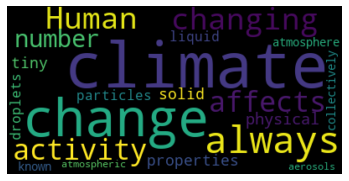

In [242]:
# here is a sample
text = "climate change. Climate is always changing. Human activity also affects climate through changes in the number and physical properties of tiny solid particles and liquid droplets in the atmosphere, known collectively as atmospheric aerosols"
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")


plt.show()

As you can see word size is proportional to frequency of a word and highlight the main keywords in a text.
This gives an idea about the content of the  text.

We can do all the text pre processing or wrangling
 like 

- More Cleaning
- Case conversion
- Spell correction
- Expanding contractions
- Removing stop words
- Morphological normalization
    - Stemming
    - Lemmatization


But for this homework we'll only **do expanding contractions,  stop words removal,  and lemmatization**

# Q 9 (2 = .5+.5+.5+.5 points) Do
- expanding contractions
- stop words removal
- lemmatization
- Use wordcloud to visualize keywords

In [271]:
# write code here
import contractions
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
# I have include a sample ooutput. Your output can be different

In [265]:
text = " ".join(i for i in climate_feed_df.final_tweet_text)
# contraction
expanded_words = []   
for word in text.split():
    expanded_words.append(contractions.fix(word))

In [266]:
#lemmatization
lemmatizer=WordNetLemmatizer()
expanded_words = [lemmatizer.lemmatize(words) for words in expanded_words]
expanded_text = ' '.join(expanded_words)

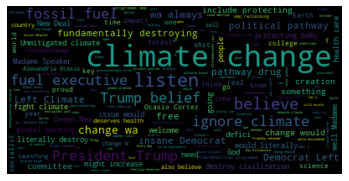

In [272]:
stopwords = set(stopwords.words('english'))
wordcloud = WordCloud(stopwords=stopwords).generate(expanded_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Homework ends
# Final thoughts
We did not do all of the cleanup or used all attributes for EDA. Let us highlight one more cleanup activity related to language.

In [72]:
import enchant

In [73]:
dictionary = enchant.Dict('en')

In [70]:
climate_feed_df['text'].loc[5217]

'去LACMA那么多次，都没意识到旁边的Tar Pits是啥…\n一直以为是摆几个造型给小朋友们玩的公园…\n站在千年前的point看千年后的楼宇车辆，再一想climate change，千年后人类可能也不存在了就觉得——有点兴奋'

In [74]:
[dictionary.check(w) for w in  nltk.word_tokenize(climate_feed_df['text'].loc[5217])]

[False, False, False, False, False]